# Decision Tree Classifier 
## -> without removing stopwords, without stemming
- Accuracy: 0.839

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')

df_sample = df.sample(20000)

df_target = df_sample['humor']
df_data = df_sample.copy()
df_data.drop(columns='humor')

df_target.head()

141367    False
64500      True
113769     True
12743     False
502       False
Name: humor, dtype: bool

In [2]:
df['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

# Preprocessing

In [3]:
from sklearn import preprocessing

#encode target to numeric
label_encoder = preprocessing.LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
df_target

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Apply CountVectorizer on text column

#vectorizer = CountVectorizer(binary=True)

#If this vectorizer is used, a word which occurs multiple times is counted and not just displayed as 1 = word occurs 
#cVectorizer = CountVectorizer(binary=False)

matrix = vectorizer.fit_transform(df_data['text'].head(15))

print("Vectorizer created {} features.".format(len(vectorizer.get_feature_names())))

vectorizer = TfidfVectorizer(min_df=0.0015)
matrix = vectorizer.fit_transform(df_data['text'])

df_data_countVectorized = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(df_data_countVectorized)

Vectorizer created 134 features.


,000,10,100,11,12,13,15,20,2012,2013,...,year,years,yes,yet,yo,york,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.162000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.506855,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create train/test split
df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_countVectorized, df_target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_leaf_nodes=89, random_state=42)
dt.fit(df_data_train, df_target_train)   

df_prediction = dt.predict(df_data_test)

print("Accuracy: {}".format(accuracy_score(df_target_test, df_prediction)))

Accuracy: 0.839


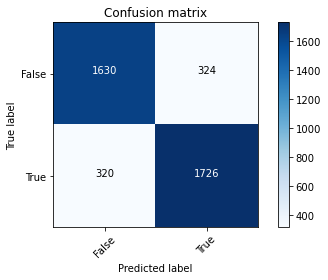

In [18]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
cnf_matrix = confusion_matrix(df_target_test, df_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)